# Exploratory data analysis of the dataset 
The dataset we will be using is a reanalysis dataset provided by National Weather Direction of Madagascar.

Importing all the needed libraries

In [1]:
library("dplyr")
library("readxl")
library("ggplot2")
library("lubridate")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




Reading the dataset with readxl and explore its head and its summary.

In [2]:
data = read_excel("data.xlsx")
head(data)
summary(data)

date,RR(mm),MSLP(Hpa),FF10(Kt),FF200(Kt),FF700(Kt),FF850(Kt),RH500,RH700,Tmin(°C),Tmax(°C),Tmoy(°C)
<dttm>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1993-01-01,3.6,1017.4,2.716537,25.85169,5.512872,3.39564,27.92494,73.43215,17.7,27.8,21.6
1993-01-02,6.7,1015.5,4.338355,8.151109,5.183357,7.844608,45.49866,78.35376,17.9,27.5,21.9
1993-01-03,16.6,1013.2,4.43866,15.70747,10.18365,8.940825,68.28097,82.5871,16.9,26.2,20.7
1993-01-04,1.1,1013.7,7.050377,25.36832,5.328906,12.15593,41.93768,77.08398,16.6,23.9,19.8
1993-01-05,1.1,1015.7,6.355413,27.67465,5.66897,11.03134,45.03161,76.19373,17.3,25.1,20.6
1993-01-06,0.1,1016.7,5.703236,17.93404,6.19368,9.423871,48.24716,60.41839,16.9,26.3,21.4


      date                RR(mm)          MSLP(Hpa)        FF10(Kt)        
 Min.   :1993-01-01   Min.   :  0.000   Min.   : 998.7   Length:10957      
 1st Qu.:2000-07-02   1st Qu.:  0.000   1st Qu.:1015.6   Class :character  
 Median :2008-01-01   Median :  0.200   Median :1018.3   Mode  :character  
 Mean   :2008-01-01   Mean   :  3.001   Mean   :1018.5                     
 3rd Qu.:2015-07-02   3rd Qu.:  1.800   3rd Qu.:1021.5                     
 Max.   :2022-12-31   Max.   :145.300   Max.   :1030.0                     
  FF200(Kt)          FF700(Kt)          FF850(Kt)            RH500          
 Length:10957       Length:10957       Length:10957       Length:10957      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
      

Grouping the dataset by month and make a little exploration

In [3]:
monthly = data%>%
group_by(month(date))%>%
summarize(RR = sum(.data[["RR(mm)"]]),MSLP = mean(.data[["MSLP(Hpa)"]]),FF10 = mean(as.integer(.data[["FF10(Kt)"]])),
FF200 = mean(as.integer(.data[["FF200(Kt)"]])),FF700 = mean(as.integer(.data[["FF700(Kt)"]])),FF850 = mean(as.integer(.data[["FF850(Kt)"]])),RH500 = mean(as.integer(.data[["RH500"]])),RH700 = mean(as.integer(.data[["RH700"]])),Tmin = mean(.data[["Tmin(°C)"]]),Tmax = mean(.data[["Tmax(°C)"]]),Tmoy = mean(.data[["Tmoy(°C)"]]))

monthly


month(date),RR,MSLP,FF10,FF200,FF700,FF850,RH500,RH700,Tmin,Tmax,Tmoy
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,8828.5,1014.102,4.888172,20.87527,10.011828,8.926882,57.653763,74.13333,17.225269,25.27753,20.53387
2,7752.1,1013.854,5.141677,19.80047,10.681228,9.312869,54.216057,72.83353,17.191499,25.08760,20.46328
3,4661.4,1015.253,5.224731,22.14086,9.780645,9.756989,43.179570,67.20000,16.813118,25.02323,20.19634
4,1134.4,1017.509,5.178889,38.14667,8.228889,10.003333,26.645556,58.05111,15.221333,24.22978,19.02800
5,497.8,1019.638,5.066667,53.19785,8.883871,9.897849,12.774194,51.29247,12.995376,22.27989,16.97656
6,275.1,1022.098,5.922222,42.81333,10.388889,11.831111,6.892222,39.77444,10.705111,19.86189,14.63533
7,258.5,1023.212,6.484946,36.59785,11.465591,12.854839,6.205376,37.92796,9.940538,18.99989,13.79376
8,187.8,1022.705,6.061290,36.42366,10.978495,11.768817,5.455914,38.60108,10.049247,20.44247,14.56505
9,236.6,1021.369,5.863333,37.46889,11.196667,10.948889,7.673333,45.25000,11.220222,22.77256,16.30256


# Monthly data plot function
This is a function to plot a parameter monthly and display every month separately. As an example we are plotting the mean temperature for the Analamanga region display each month from 1993 to 2022.

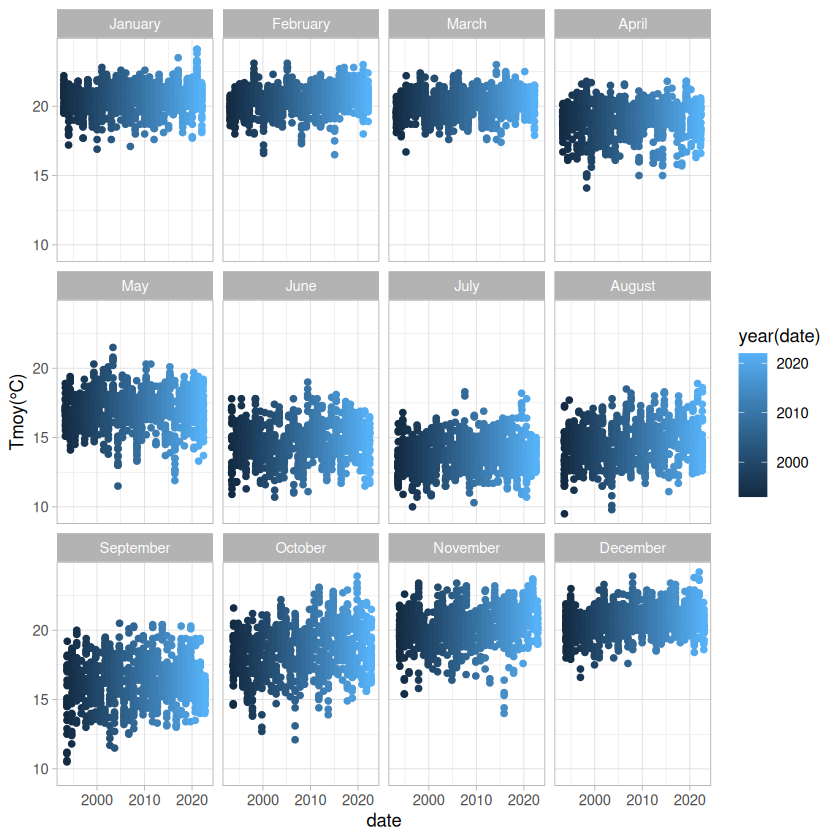

In [13]:
monthly_plot = function(parameter){
ggplot(data)+
geom_point(mapping = aes(x = date,y = .data[[parameter]],color = year(.data[["date"]])))+
facet_wrap(~month(date,label = TRUE,abbr = FALSE),nrow = 3)+
theme_light()}
monthly_plot("Tmoy(°C)")

# Grouping by year and make visualization



In [5]:
pere_year = data%>%
group_by(year(date))%>%
summarize(RR = sum(.data[["RR(mm)"]]),MSLP = mean(.data[["MSLP(Hpa)"]]),FF10 = mean(as.integer(.data[["FF10(Kt)"]])),
FF200 = mean(as.integer(.data[["FF200(Kt)"]])),FF700 = mean(as.integer(.data[["FF700(Kt)"]])),FF850 = mean(as.integer(.data[["FF850(Kt)"]])),RH500 = mean(as.integer(.data[["RH500"]])),RH700 = mean(as.integer(.data[["RH700"]])),Tmin = mean(.data[["Tmin(°C)"]]),Tmax = mean(.data[["Tmax(°C)"]]),Tmoy = mean(.data[["Tmoy(°C)"]]))

pere_year

year(date),RR,MSLP,FF10,FF200,FF700,FF850,RH500,RH700,Tmin,Tmax,Tmoy
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1993,1006.5,1018.993,5.413699,35.97534,10.347945,10.254795,24.98630,54.07123,13.28411,22.80932,17.40466
1994,1311.8,1018.285,5.515068,35.08493,10.572603,10.378082,27.92055,55.32603,13.70219,22.94630,17.74301
1995,1201.2,1018.230,5.276712,34.22466,9.367123,9.898630,25.09315,55.03836,13.79342,23.29288,17.85589
1996,1083.9,1018.053,5.196721,32.00000,9.989071,9.702186,27.73224,53.32787,13.35082,23.28579,17.65027
1997,1182.4,1019.016,4.912329,38.32877,9.312329,9.443836,29.23562,60.30685,13.69151,22.97041,17.66137
1998,1331.0,1019.095,5.323288,33.68493,8.832877,10.191781,25.80548,53.38356,13.90521,23.36466,17.93726
1999,656.5,1019.032,5.452055,33.54247,9.115068,10.345205,24.26849,56.12877,13.27342,23.15836,17.55096
2000,901.8,1018.409,5.773224,31.74044,10.191257,10.773224,25.67486,59.16120,13.46475,22.98033,17.55082
2001,924.0,1018.501,5.084932,32.43014,9.498630,9.487671,22.32603,53.21370,13.76822,23.86301,18.10712


Plotting parameters by year

Warning message:
“Use of `pere_year[["year(date)"]]` is discouraged.
ℹ Use `.data[["year(date)"]]` instead.”
Warning message:
“Use of `pere_year[[parameter]]` is discouraged.
ℹ Use `.data[[parameter]]` instead.”
Warning message:
“Use of `pere_year[["year(date)"]]` is discouraged.
ℹ Use `.data[["year(date)"]]` instead.”
Warning message:
“Use of `pere_year[[parameter]]` is discouraged.
ℹ Use `.data[[parameter]]` instead.”
Warning message:
“Use of `pere_year[["year(date)"]]` is discouraged.
ℹ Use `.data[["year(date)"]]` instead.”
Warning message:
“Use of `pere_year[[parameter]]` is discouraged.
ℹ Use `.data[[parameter]]` instead.”
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


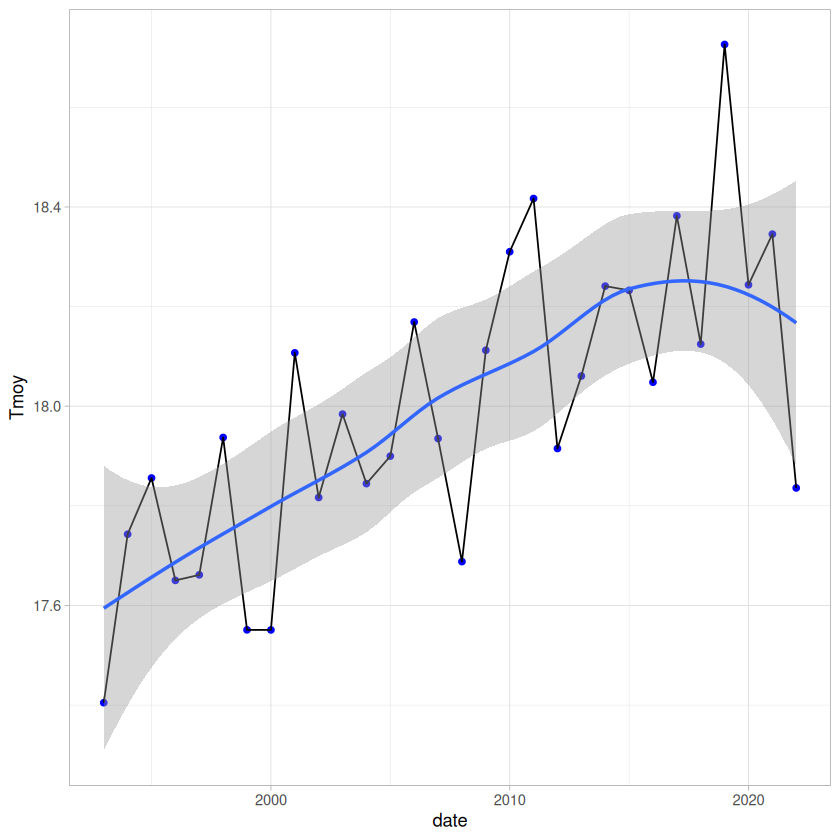

In [14]:
year_plot = function(parameter){
ggplot(pere_year)+
geom_point(mapping = aes(x = pere_year[["year(date)"]],y = pere_year[[parameter]]),color = "blue")+
geom_line(mapping = aes(x = pere_year[["year(date)"]],y = pere_year[[parameter]]))+
geom_smooth(mapping = aes(x = pere_year[["year(date)"]],y = pere_year[[parameter]]))+
labs(x = "date",y = parameter)+
theme_light()}
year_plot("Tmoy")
